<a href="https://colab.research.google.com/github/Sreeja1585/my-projects/blob/main/Support_Vector_Machines_(SVM)_Task7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib.colors import ListedColormap


In [21]:
data_raw = np.genfromtxt("breast-cancer.csv", delimiter=",", skip_header=1, dtype=str)
data_clean = data_raw[~np.any(data_raw == '', axis=1)]
X = data_clean[:, 2:4].astype(float)
y = (data_clean[:, 1] == 'M').astype(int)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [23]:
linear_svm = SVC(kernel='linear', C=1)
linear_svm.fit(X_train, y_train)

rbf_svm = SVC(kernel='rbf', C=1, gamma='scale')
rbf_svm.fit(X_train, y_train)


SVC(C=1)

In [24]:
y_pred_linear = linear_svm.predict(X_test)
y_pred_rbf = rbf_svm.predict(X_test)

print(accuracy_score(y_test, y_pred_linear))
print(accuracy_score(y_test, y_pred_rbf))

print(confusion_matrix(y_test, y_pred_linear))
print(confusion_matrix(y_test, y_pred_rbf))


0.9035087719298246
0.9210526315789473
[[67  4]
 [ 7 36]]
[[67  4]
 [ 5 38]]


In [25]:
def plot_decision_boundary(X, y, model, title):
    X1, X2 = np.meshgrid(
        np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, 0.01),
        np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, 0.01)
    )
    Z = model.predict(np.c_[X1.ravel(), X2.ravel()]).reshape(X1.shape)
    plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(['red', 'green']))
    for i, cls in enumerate(np.unique(y)):
        plt.scatter(X[y == cls, 0], X[y == cls, 1],
                    c=ListedColormap(['red', 'green'])(i), label=f"Class {cls}")
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()


/tmp/ipython-input-25-2757729421.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[y == cls, 0], X[y == cls, 1],


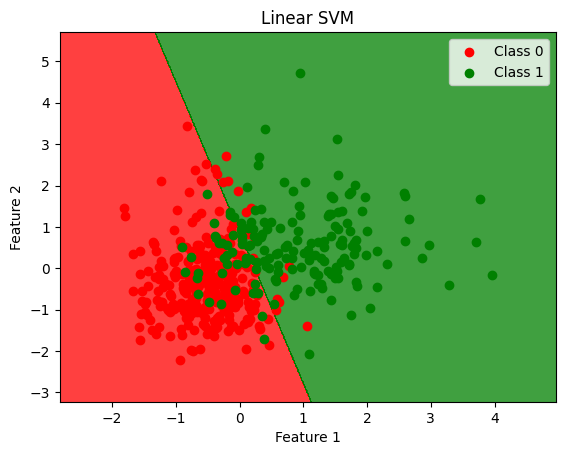

/tmp/ipython-input-25-2757729421.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[y == cls, 0], X[y == cls, 1],


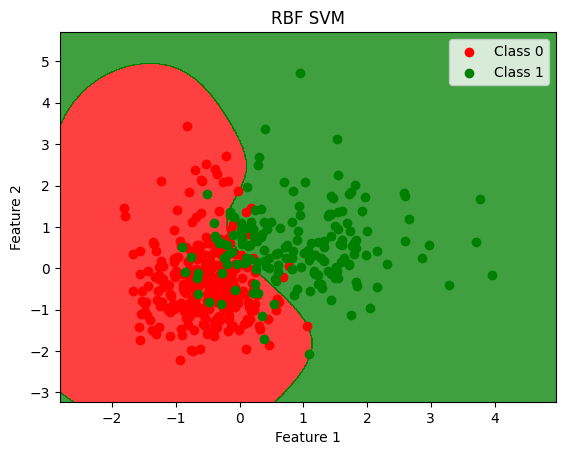

In [26]:
plot_decision_boundary(X_train, y_train, linear_svm, "Linear SVM")
plot_decision_boundary(X_train, y_train, rbf_svm, "RBF SVM")


In [27]:
params = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['rbf']
}
grid = GridSearchCV(SVC(), params, cv=5)
grid.fit(X_train, y_train)
print(grid.best_params_)


{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [28]:
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)
print(accuracy_score(y_test, y_pred_best))
print(confusion_matrix(y_test, y_pred_best))


0.9122807017543859
[[66  5]
 [ 5 38]]


In [29]:
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5)
print(cv_scores)
print(cv_scores.mean())


[0.89010989 0.91208791 0.95604396 0.87912088 0.86813187]
0.9010989010989011
